In [34]:
import pandas as pd

df = pd.read_excel("all_vacancies.xlsx")
df.shape
#(3150, 10)
df.head()

,id,name,company,city,key_skills,salary_from,salary_to,experience,schedule,alternate_url
0,117685242,Аналитик в практику Организационного консалтинга,RusPartners,Москва,"MS PowerPoint, Английский язык, Подготовка пре...",0.0,0.0,Нет опыта,Полный день,https://hh.ru/vacancy/117685242
1,117129644,Аналитик поддержки продукта Naumen Erudite,NAUMEN,Москва,NaN,0.0,0.0,От 1 года до 3 лет,Удаленная работа,https://hh.ru/vacancy/117129644
2,112418394,Системный аналитик (Стажер),Центр финансовых технологий,Владивосток,"Системный анализ, Бизнес-анализ, Аналитика",0.0,0.0,Нет опыта,Полный день,https://hh.ru/vacancy/112418394
3,117743231,Аналитик данных / Data Analyst,Saber Interactive,Санкт-Петербург,"SQL, Python, Clickhouse, Apache Airflow, Strea...",0.0,0.0,От 3 до 6 лет,Удаленная работа,https://hh.ru/vacancy/117743231
4,116150637,Бизнес-аналитик,Texnomart,Ташкент,NaN,0.0,0.0,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/116150637


In [35]:
missing = df.isnull().sum()
percent_missing = (missing / len(df)) * 100
missing_data = pd.DataFrame({'missing': missing, 'percent': percent_missing})
print("Пропуски в данных:\n", missing_data)

Пропуски в данных:
                missing    percent
id                   0   0.000000
name                 0   0.000000
company              0   0.000000
city                 0   0.000000
key_skills        1204  38.222222
salary_from        178   5.650794
salary_to          629  19.968254
experience           0   0.000000
schedule             0   0.000000
alternate_url        0   0.000000


key_skills: возможно, навыки не указаны => заменю на 'Не указано'
salary_from/salary_to: не все вакансии указывают ЗП => удалю строки, где пропущены оба значения + новое поле со средним или с заполненным значением (скорее всего этим смещу результаты, но лучше так, чем никак)

In [54]:
df['key_skills'] = df['key_skills'].fillna('Не указано')

In [37]:
mask = (
    (df[['salary_from', 'salary_to']].isnull().all(axis=1)) | 
    ((df['salary_from'] == 0) & (df['salary_to'] == 0))
)
df = df[~mask].copy()
df.shape

(1363, 10)

In [38]:
def calculate_avg(row):
    if pd.notnull(row['salary_from']) and pd.notnull(row['salary_to']):
        if row['salary_from'] == 0:
            return row['salary_to']
        elif row['salary_to'] == 0:
            return row['salary_from']
        else:
            return (row['salary_from'] + row['salary_to']) / 2
    else:
        return row['salary_from'] if pd.notnull(row['salary_from']) else row['salary_to']

df['salary_avg'] = df.apply(calculate_avg, axis=1)
df.head()

,id,name,company,city,key_skills,salary_from,salary_to,experience,schedule,alternate_url,salary_avg
8,114673345,BI-аналитик,ЛУКОЙЛ,Москва,"Power BI, Apache Airflow, SQL",NaN,150000.0,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/114673345,150000.0
11,117262495,Аналитик,Всм,Москва,"Контроль и анализ ценообразования, Unit-эконом...",80000.0,120000.0,От 1 года до 3 лет,Удаленная работа,https://hh.ru/vacancy/117262495,100000.0
13,116537974,Системный аналитик (junior+),ИТРУМ,Ростов-на-Дону,"Системный аналитик, UML, SQL, Функциональные т...",70000.0,80000.0,Нет опыта,Удаленная работа,https://hh.ru/vacancy/116537974,75000.0
14,117347065,Marketing Data Analyst,Топассистент,Москва,"Python, SQL, MS Excel, Tableau, Бизнес-анализ,...",400000.0,NaN,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/117347065,400000.0
15,116767298,Crypto-аналитик,Евсеев Сергей Владимирович,Москва,"Английский язык, Аналитический склад ума, Анал...",150000.0,450000.0,От 1 года до 3 лет,Удаленная работа,https://hh.ru/vacancy/116767298,300000.0


In [39]:
#Типы данных
df.dtypes

id                 int64
name              object
company           object
city              object
key_skills        object
salary_from      float64
salary_to        float64
experience        object
schedule          object
alternate_url     object
salary_avg       float64
dtype: object

Все типы данных для столбцов верные
Категориальные: name, city, company, key_skills, experience, schedule
Числовые: id, salary_from, salary_to, salary_avg

In [40]:
#Описательные статистики
df.describe(include='all')

,id,name,company,city,key_skills,salary_from,salary_to,experience,schedule,alternate_url,salary_avg
count,1.363000e+03,1363,1363,1363,1363,1.185000e+03,7.340000e+02,1363,1363,1363,1.363000e+03
unique,NaN,645,1069,125,815,NaN,NaN,4,4,1363,NaN
top,NaN,Аналитик,Aston,Москва,Не указано,NaN,NaN,От 1 года до 3 лет,Полный день,https://hh.ru/vacancy/115161102,NaN
freq,NaN,145,26,496,449,NaN,NaN,859,917,1,NaN
mean,1.162743e+08,NaN,NaN,NaN,NaN,2.256189e+05,3.239415e+05,NaN,NaN,NaN,2.543664e+05
std,3.743116e+06,NaN,NaN,NaN,NaN,1.347581e+06,1.751238e+06,NaN,NaN,NaN,1.460992e+06
min,4.293277e+07,NaN,NaN,NaN,NaN,8.000000e+00,1.000000e+01,NaN,NaN,NaN,9.000000e+00
25%,1.165753e+08,NaN,NaN,NaN,NaN,6.000000e+04,7.525000e+04,NaN,NaN,NaN,6.500000e+04
50%,1.171092e+08,NaN,NaN,NaN,NaN,8.000000e+04,1.100000e+05,NaN,NaN,NaN,9.500000e+04
75%,1.174895e+08,NaN,NaN,NaN,NaN,1.200000e+05,1.687500e+05,NaN,NaN,NaN,1.500000e+05


In [41]:
numerical = ['salary_from', 'salary_to', 'salary_avg']
categorical = ['name', 'city', 'company', 'experience', 'schedule']

In [42]:
for col in numerical:
    print(f"\n{col}:")
    print(f"Диапазон: {df[col].min()} - {df[col].max()}")


salary_from:
Диапазон: 8.0 - 27600000.0

salary_to:
Диапазон: 10.0 - 35000000.0

salary_avg:
Диапазон: 9.0 - 27600000.0


Кажется, было бы еще неплохо указывать валюту, птм зарплата в 8 уе точно не в рублях.

!подумать, нужно ли исключать такие строки вообще и если исключать, то с какого порога

In [43]:
Q1 = df['salary_from'].quantile(0.25)
Q3 = df['salary_from'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['salary_from'] < lower_bound) | (df['salary_from'] > upper_bound)]
print(f"Выбросы в salary_from: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
df = df[(df['salary_from'] >= lower_bound) & (df['salary_from'] <= upper_bound)]

Выбросы в salary_from: 96 (7.04%)


In [44]:
df.shape

(1089, 11)

In [45]:
for col in categorical:
    print(f"\n{col}:")
    print("Уникальные значения:", df[col].nunique())
    print("Топ-5 значений:")
    print(df[col].value_counts().head())


name:
Уникальные значения: 519
Топ-5 значений:
Аналитик               117
Бизнес-аналитик         95
Аналитик данных         62
Финансовый аналитик     46
Экономист-аналитик      27
Name: name, dtype: int64

city:
Уникальные значения: 108
Топ-5 значений:
Москва             395
Санкт-Петербург    115
Екатеринбург        44
Нижний Новгород     36
Казань              34
Name: city, dtype: int64

company:
Уникальные значения: 868
Топ-5 значений:
Aston                            26
Топассистент                     13
Бизнес Технологии                 8
ЭОС                               7
Группа кадровых компаний АКМЭ     7
Name: company, dtype: int64

experience:
Уникальные значения: 4
Топ-5 значений:
От 1 года до 3 лет    695
Нет опыта             212
От 3 до 6 лет         175
Более 6 лет             7
Name: experience, dtype: int64

schedule:
Уникальные значения: 4
Топ-5 значений:
Полный день         725
Удаленная работа    360
Гибкий график         3
Сменный график        1
Name: schedu

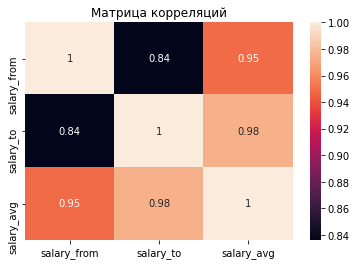

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Матрица корреляций")
plt.show()

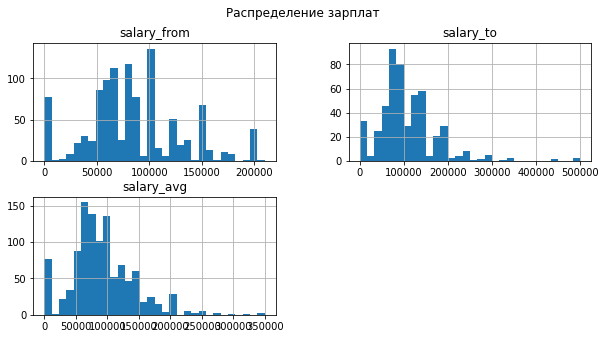

In [49]:
df[numerical].hist(bins=30, figsize=(10,5))
plt.suptitle("Распределение зарплат")
plt.show()

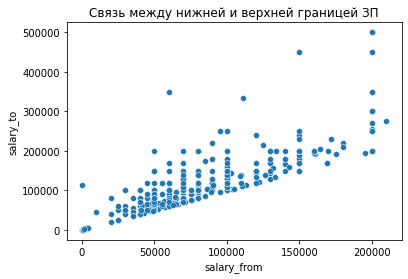

In [50]:
sns.scatterplot(x='salary_from', y='salary_to', data=df)
plt.title("Связь между нижней и верхней границей ЗП")
plt.show()

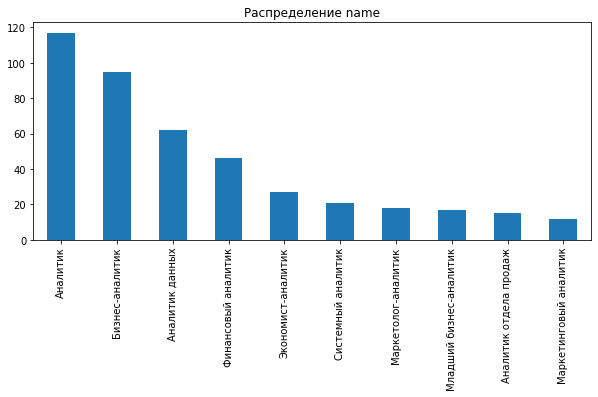

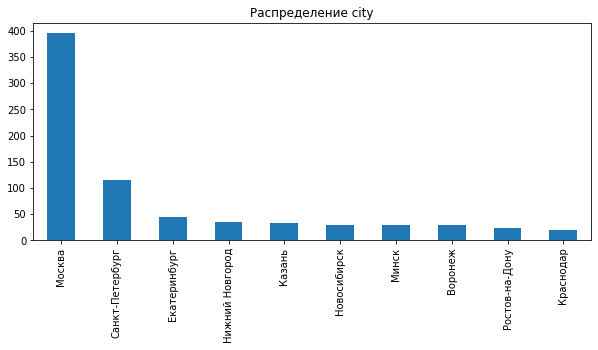

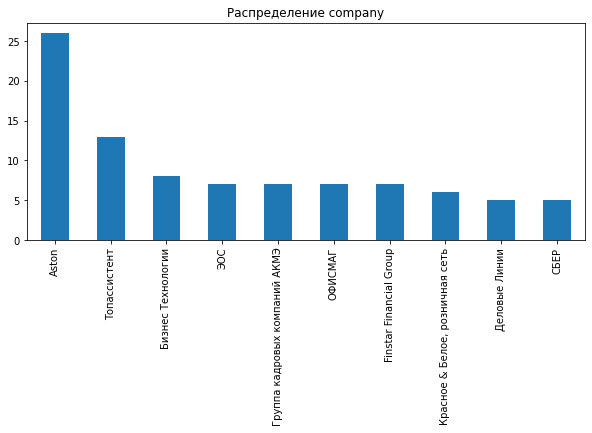

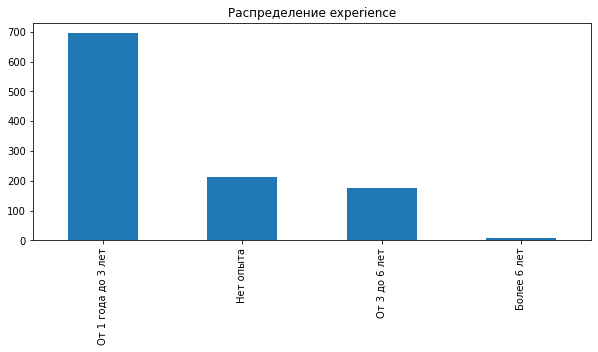

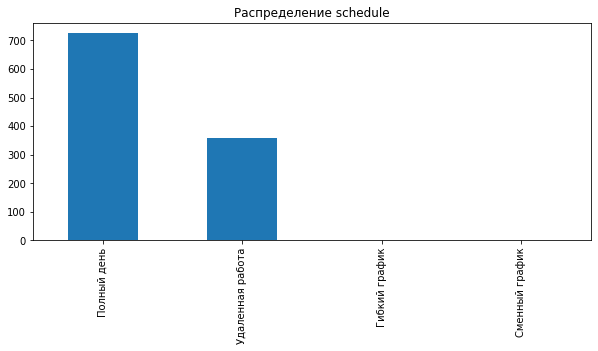

In [58]:
for col in categorical:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Распределение {col}")
    plt.xticks(rotation=90)
    plt.show()

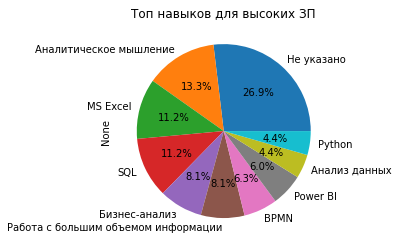

In [59]:
#Навыки для высокооплачиваемых вакансий
high_salary = df[df['salary_from'] > df['salary_from'].quantile(0.75)]
skills_high = high_salary['key_skills'].str.split(', ', expand=True).stack().value_counts().head(10)
skills_high.plot(kind='pie', autopct='%1.1f%%', title="Топ навыков для высоких ЗП")

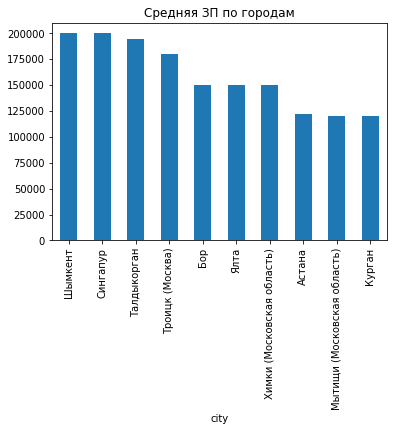

In [61]:
#Средняя ЗП по городам
city_salary = df.groupby('city')['salary_from'].mean().sort_values(ascending=False).head(10)
city_salary.plot(kind='bar', title="Средняя ЗП по городам")

Text(0.5, 1.0, 'Топ-10 компаний по количеству вакансий')

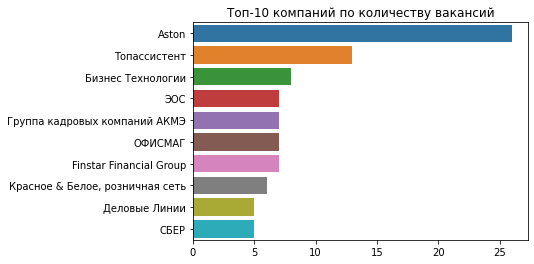

In [62]:
#Какие компании чаще всего публикуют вакансии
top_companies = df['company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title("Топ-10 компаний по количеству вакансий")

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

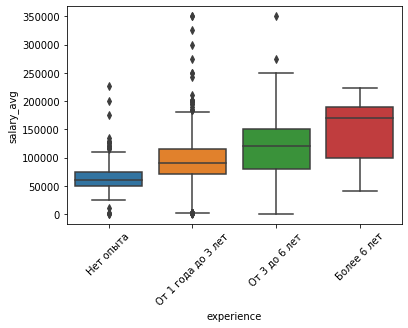

In [64]:
#Как связан опыт с медианной зарплатой?
sns.boxplot(x='experience', y='salary_avg', data=df, order=['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'])
plt.xticks(rotation=45)

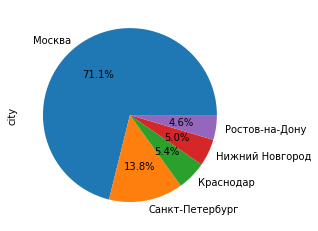

In [65]:
#Какие города лидируют по количеству вакансий с удаленным графиком?
remote_cities = df[df['schedule'].str.contains('Удаленная работа')]['city'].value_counts().head(5)
remote_cities.plot(kind='pie', autopct='%1.1f%%')

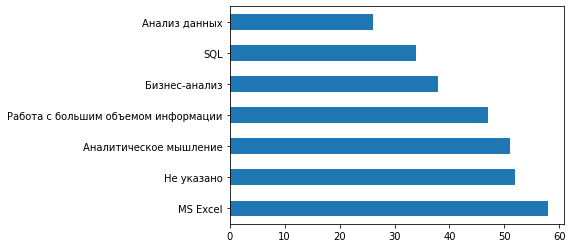

In [70]:
#Какие навыки чаще всего требуются для вакансий без опыта?
no_exp_skills = df[df['experience'] == 'Нет опыта']['key_skills'].str.split(', ', expand=True).stack().value_counts().head(7)
no_exp_skills.plot(kind='barh')

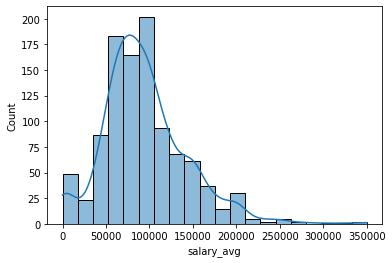

In [71]:
#Как распределены зарплаты для Аналитиков?
analyst_salaries = df[df['name'].str.contains('Аналитик', case=False)]['salary_avg']
sns.histplot(analyst_salaries, bins=20, kde=True)

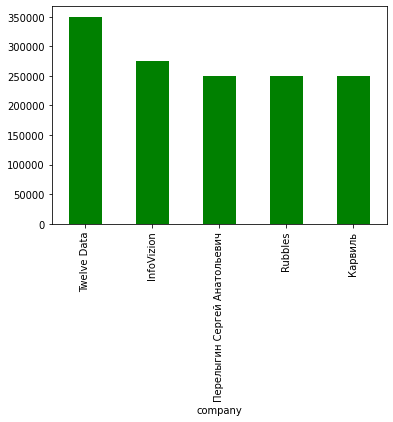

In [74]:
#Какие компании предлагают самые высокие зарплаты в категории 'От 3 до 6 лет опыта'?
top_paying = df[df['experience'] == 'От 3 до 6 лет'].groupby('company')['salary_avg'].median().sort_values(ascending=False).head(5)
top_paying.plot(kind='bar', color='green')

In [77]:
#Как часто встречаются вакансии с зарплатой выше 200k? В каких городах?
high_salary = df[df['salary_avg'] > 200000]
print(f"Доля таких вакансий: {len(high_salary)/len(df)*100:.1f}%")
high_salary['city'].value_counts().head(3)

Доля таких вакансий: 2.0%


Москва             12
Астана              3
Санкт-Петербург     3
Name: city, dtype: int64

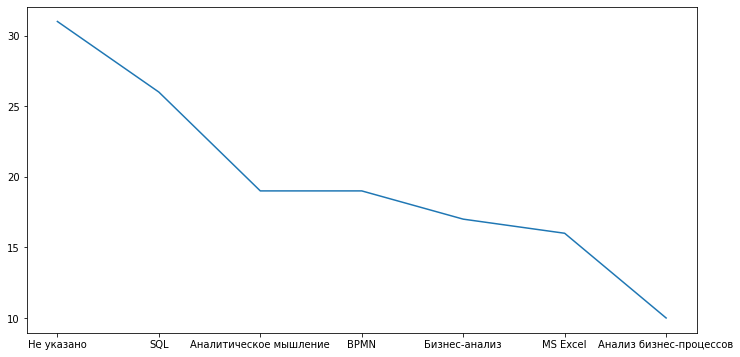

In [82]:
#Какие навыки ассоциируются с самыми высокими зарплатами?
high_skills = df[df['salary_avg'] > df['salary_avg'].quantile(0.9)]['key_skills'].str.split(', ', expand=True).stack().value_counts().head(7)
plt.figure(figsize=(12, 6)) 
sns.lineplot(x=high_skills.index, y=high_skills.values)

In [80]:
#Как соотносятся требования к опыту в разных городах?
pd.crosstab(df['city'], df['experience'], normalize='index').style.background_gradient(cmap='Blues')

experience,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
city,,,,
Адлер,0.000000,0.500000,0.500000,0.000000
Алматы,0.000000,0.200000,0.600000,0.200000
Артем,0.000000,0.000000,1.000000,0.000000
Архангельск,0.000000,0.000000,0.500000,0.500000
Астана,0.000000,0.142857,0.428571,0.428571
Астрахань,0.000000,0.000000,1.000000,0.000000
Барнаул,0.000000,0.000000,1.000000,0.000000
Белгород,0.000000,0.000000,1.000000,0.000000
Березовский (Свердловская область),0.000000,0.000000,0.000000,1.000000
